## SimplyUnet Implementation Guidance

This is a step-by-step guidance of how to implement the SimplyUnet model to generate multispectral images from the RGB image. You can either run the manually run the code below or run the script with the single command line.

In [1]:
!pip install -r requirements.txt -q
print("Installation completed.")


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Installation completed.


### ✔ Run with a single command line

In [2]:
# !python train.py --trainpath  '../train/' --valpath '../val/' --name 'example'

#### ✍ Run manually by explicitly listing settings 

In [1]:
import torch
import warnings
import torch.nn as nn
import torch.optim as optim
from model import SimplyUNet
from utils.data import load_datasets
from train import train_test_model, VGGFeatureExtractor, gen_img

# torch.cuda.manual_seed(42) #Fixed seed for the reproductability
warnings.filterwarnings("ignore")

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Feel free to explore other variations of models in the 'unets' directory.
model = SimplyUNet()
vgg_feature_extractor = VGGFeatureExtractor()

# Define paths and hyperparameters
train_path =  '../../train/' 
val_path = '../../val/'

Using device: cuda


In [3]:
learning_rate = 0.02
epochs = 5

In [4]:
model = SimplyUNet()
vgg_feature_extractor = VGGFeatureExtractor()
optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_test_model(model,train_path,val_path, optimizer, scheduler,device, epochs, 'GSOC','ENTER YOUR W&B ENTITY NAME','sample')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ss26348 (ss26348-queen-mary-university-of-london). Use `wandb login --relogin` to force relogin


Best model saved with Validation LPIPS: 0.0035


#### 👉 Load saved model from best_model directory

In [ ]:
#Choose suitable best model path from the directory
# EXAMPLE. best_model_path = 'baseUnet_0_0.0004.pth'

best_model_path = 'BEST MODEL PATH'
model = SimplyUNet()
test_path = '../../val/rgb_images' #Due to lack of datsaet, use val_path temporarily
output_dir = './saved_output'
gen_img(model, best_model_path, test_path, output_dir, device)

### Extract the Hidden Painting

In [4]:
from extract.extract import SiameseNetwork, view_extract
from extract.train_extract import train
from extract.data import load_datasets
import os
torch.cuda.empty_cache()

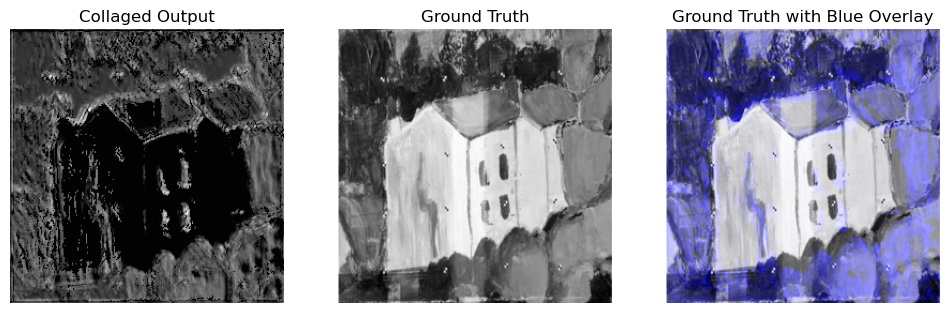

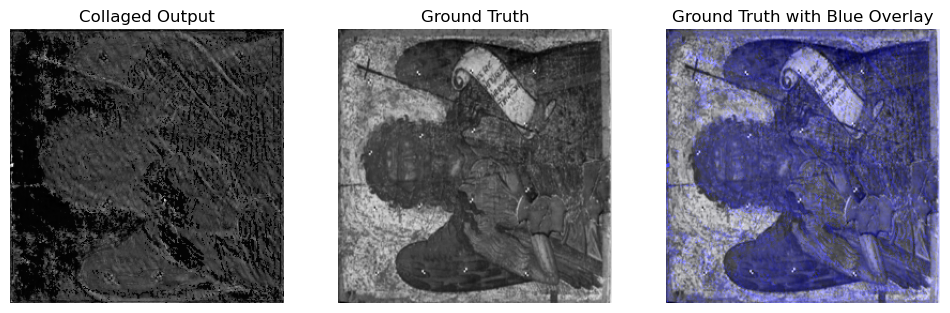

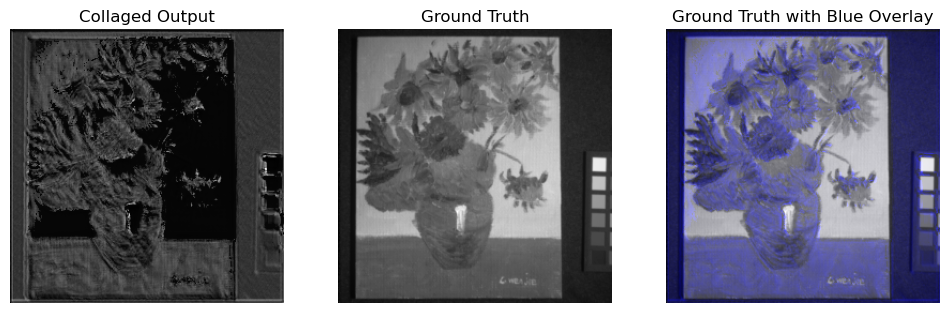

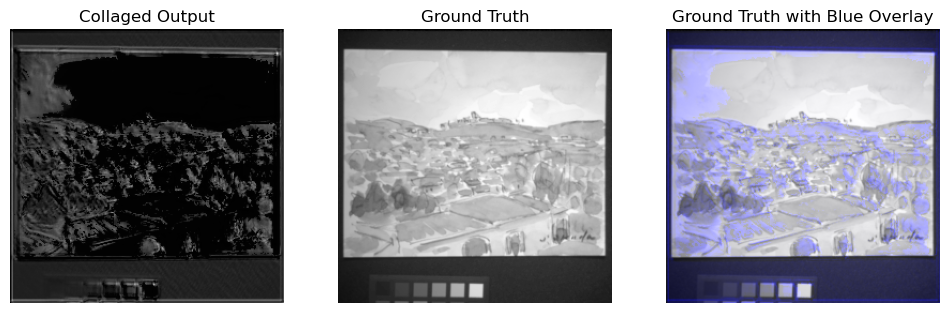

In [5]:
model = SiameseNetwork().to(device)
img_dir ='../../val/'
visible_files = [f for f in os.listdir(img_dir+'rgb_images/') if not f.startswith('~')] #Exclude the visible file
img_num = len(visible_files)
data_loader = load_datasets(img_dir,img_num)
view_extract(data_loader, model, device)